# Introduction

## Very simple case

In [1]:
from collections import defaultdict

In this section of the code, we’re simply organizing and simulating the type of data you might find in your email campaign reports. Imagine you’re looking at a table where every row is a record of an individual email that was sent out to a subscriber. For each email, you’re tracking which subscriber received it (using a simple number for their ID), what topic the email was about (like “NEWS”, “SALE”, or “TIPS”), and whether the email was opened or clicked on by the recipient.

In [2]:
# Organize the data
emails = [
    {"subscriber_id": 1, "email_code": "NEWS", "opened": 1, "clicked": 0},
    {"subscriber_id": 1, "email_code": "SALE", "opened": 1, "clicked": 1},
    {"subscriber_id": 1, "email_code": "TIPS", "opened": 0, "clicked": 0},

    {"subscriber_id": 1, "email_code": "NEWS", "opened": 1, "clicked": 0},
    {"subscriber_id": 1, "email_code": "SALE", "opened": 0, "clicked": 0},
    {"subscriber_id": 1, "email_code": "TIPS", "opened": 1, "clicked": 1},

    {"subscriber_id": 1, "email_code": "NEWS", "opened": 0, "clicked": 0},
    {"subscriber_id": 1, "email_code": "SALE", "opened": 1, "clicked": 1},
    {"subscriber_id": 1, "email_code": "TIPS", "opened": 1, "clicked": 0},
]


Each item in this list is a small dictionary—a way to neatly store the information about one email event. For example, the first entry says that subscriber number 1 received a “NEWS” email, opened it, but didn’t click any links in it. The next entry shows that the same subscriber received a “SALE” email, both opened it and clicked on something inside. This continues for several emails and topics, always tracking those key pieces of information: the recipient, the email topic, whether it was opened, and whether it was clicked.

By laying out the data like this, we make it easy to count, group, and analyze performance by topic, by subscriber, or over time. This is exactly the type of structured dataset you’d use if you want to start understanding which of your email topics is driving the most engagement, or to perform more advanced analyses like moving averages or value estimation (as in the RL example earlier).

In [ ]:
# Collect rewards for each topic
topic_rewards = defaultdict(list)

for email in emails:
    topic = email["email_code"]
    reward = email["clicked"]  # Define reward as 'clicked'
    topic_rewards[topic].append(reward)

In this part of the code, we want to group together all the results for each email topic, so we can later figure out which topic gets the most clicks. To do that, we set up something called topic_rewards—think of it like a set of buckets, one for each topic (“NEWS”, “SALE”, “TIPS”). Whenever we see a result for a particular topic, we’ll toss that result into the right bucket.

Now, we go through every email in our data, one by one. For each email, we check which topic it belongs to by looking at the “email_code”. We also decide what we’ll treat as our “reward”—in this case, it’s whether or not someone clicked the email (with 1 for a click and 0 for no click). We take this result and add it to the bucket for that topic. So after we’ve gone through all the emails, our topic_rewards will have three lists: one with all the “clicked” results for NEWS emails, one for SALE, and one for TIPS.

In [4]:
topic_rewards

defaultdict(list, {'NEWS': [0, 0, 0], 'SALE': [1, 0, 1], 'TIPS': [0, 1, 0]})

This result is simply showing you the grouped performance data for each topic in your email campaign.

Let’s break it down in plain language:

- For the NEWS topic, you see a list: [0, 0, 0]. Each number in the list represents a single email that was sent on the "NEWS" topic. A 0 means the recipient did not click on the email. So here, all three "NEWS" emails went unopened or, more precisely, unclicked (since we are counting clicks).
- For the SALE topic, you have [1, 0, 1]. Here, the first and last SALE emails were clicked (1 means a click), and the middle one wasn’t (0).
- For the TIPS topic, [0, 1, 0] means there were three emails, and only the second one got a click.

- This is the grouped data we created in the previous code step. Each topic has its own list, showing exactly which emails were clicked (1) or not clicked (0).


In [3]:
# Monte Carlo estimation (mean reward for each topic)
for topic, rewards in topic_rewards.items():
    value = sum(rewards) / len(rewards)
    print(f"Estimated value for topic {topic}: {value:.2f}")


Estimated value for topic NEWS: 0.00
Estimated value for topic SALE: 0.67
Estimated value for topic TIPS: 0.33


This section is where all the earlier steps come together and where the real insights start to appear. The code is looping through each email topic—so, for example, “NEWS”, “SALE”, and “TIPS”—and looking at all the results (clicks or no clicks) we gathered for that topic for this particular subscriber.

For each topic, it calculates the average—the total number of clicks divided by the number of emails sent on that topic. This average is known in statistics as the mean, but in reinforcement learning it’s called the Monte Carlo estimate of expected value. In simple terms, this is your best guess, based on the evidence so far, of how likely it is that this subscriber will click on an email about that topic.

Let’s pause and appreciate the meaning and gravity of this calculation:
With just a few lines of code, you’re moving beyond “gut feeling” or anecdotal evidence and into data-driven decision making. This isn’t just counting; it’s measuring the true, demonstrated interest of a subscriber in each topic, based on real, observed behavior. If, for this subscriber, “SALE” emails have an estimated value of 0.67, while “NEWS” and “TIPS” are at 0.0 and 0.33, you know with clarity where to focus your effort for maximum engagement.

### Remarks

This use case is intentionally kept very simple—the main goal is just to demonstrate how even a straightforward algorithm can help us uncover patterns in a subscriber’s behavior. By applying this technique, we see that we don’t need advanced tools or complex modeling to start learning from our email campaign data; sometimes, basic math and grouping can already tell us a lot.

It’s important to remember that before any analysis like this, we need to gather some historical data. Here, we’re looking at past email interactions for a single subscriber and using that data set as our source of truth. Our results are calculated by averaging these historical outcomes over time, meaning we get a summary statistic for each topic only after we’ve processed all the data.

Because of this, there are some clear limitations. For instance, we don’t see how interests might change over time, and we can only get our “answers” after collecting a full batch of emails, rather than in real time. Despite these constraints, this approach still provides us with useful insights into what a subscriber is likely to respond to—allowing us to make more informed decisions in our future campaigns.

## Improved version with a time window

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Simulate a dataset for 30 days, 3 topics, 1 subscriber
np.random.seed(42)
days = np.arange(1, 200)
topics = ["NEWS", "SALE", "TIPS"]


This code simulates an email marketing experiment over a period of 200 days, where each day one email is sent to a single subscriber, randomly chosen from three possible topics: "NEWS", "SALE", or "TIPS". The purpose is to model how subscriber engagement (in this case, whether they click the email) might change over time in a realistic, dynamic way.

Rather than assuming that engagement stays flat or simply rises or falls, the code introduces natural cyclical behavior using sine and cosine patterns — similar to how interest in certain types of content can rise and fall over time due to seasonality, campaign fatigue, or evolving preferences. For example:

Interest in NEWS emails is modeled to follow a smooth cycle, rising and falling roughly every 30 days.
SALE emails follow a different rhythm, with cycles about every 80 days — perhaps simulating larger promotional waves.
TIPS content cycles faster, possibly reflecting short-term interest in helpful content like how-tos or guides.
Each day, a topic is selected at random, and based on that day’s "click probability" for that topic, the code simulates whether the subscriber clicked the email or not (1 for clicked, 0 for not clicked). These probabilities are always kept within the valid range of 0–100% using a simple safety check.

Finally, the simulated data is saved in a structured table (df), with each row representing one day's sendout: which topic was sent, when, and whether the subscriber clicked.

In [78]:
# Set up the experiment
np.random.seed(42)
days = np.arange(1, 201)  # 200 days
topics = ["NEWS", "SALE", "TIPS"]

data = []
for day in days:
    topic = np.random.choice(topics)

    # Oscillating click probability using sine/cosine (scaled to [0, 1])
    prob = {
        "NEWS": 0.5 + 0.4 * np.sin(day / 30),  # cycles every ~30 days
        "SALE": 0.5 + 0.4 * np.cos(day / 80),  # cycles every ~40 days
        "TIPS": 0.5 + 0.3 * np.sin(day / 40)   # cycles faster
    }[topic]

    clicked = np.random.binomial(1, np.clip(prob, 0, 1))
    data.append({
        "send_time": day,
        "email_code": topic,
        "clicked": clicked
    })

df = pd.DataFrame(data)


In [79]:
df

,send_time,email_code,clicked
0,1,TIPS,0
1,2,TIPS,0
2,3,NEWS,0
3,4,SALE,1
4,5,TIPS,1
...,...,...,...
195,196,SALE,0
196,197,NEWS,1
197,198,NEWS,1
198,199,NEWS,1


window_size = 50 sets the size of a sliding time window — in this case, 50 days. This means we’ll be analyzing email engagement (e.g. click rates) over a rolling 50-day period.

In [88]:
window_size = 50
rolling_results = {}

This block of code calculates a rolling view of email engagement, showing how each topic ("NEWS", "SALE", or "TIPS") performs over time within a 50-day sliding window. In other words, it answers the question: “In the last 50 days, how well has each topic been performing?”

It works by sliding a window forward one day at a time. For each day (starting from day 50), it looks back at the previous 50 days of data. Within that window, it filters the dataset to include only those 50 days and then calculates the average click rate for each topic during that period.

These click rates — one for each topic — are then stored in a dictionary along with the current day (end_day). This gives a snapshot of topic performance for that specific 50-day period. All of these daily snapshots are collected in a list called rolling_topic_stats.

Finally, the code converts this list into a structured table called rolling_df, where each row represents a day, and each column shows the average click rate for a particular topic within the rolling window ending on that day. Any missing values (e.g. if a topic didn’t appear in a window) are filled with zero.

In [89]:
# Create a DataFrame to store rolling results
rolling_topic_stats = []

# Slide the window day by day
for end_day in range(window_size, df['send_time'].max() + 1):
    window_df = df[(df['send_time'] > end_day - window_size) & (df['send_time'] <= end_day)]

    # Group by topic within the window
    stats = window_df.groupby('email_code')['clicked'].mean().to_dict()
    stats['send_time'] = end_day
    rolling_topic_stats.append(stats)

rolling_df = pd.DataFrame(rolling_topic_stats).fillna(0)


In [90]:
rolling_df

,NEWS,SALE,TIPS,send_time
0,0.625000,1.000000,0.444444,50
1,0.647059,1.000000,0.470588,51
2,0.647059,0.941176,0.500000,52
3,0.705882,0.941176,0.500000,53
4,0.705882,0.937500,0.529412,54
...,...,...,...,...
146,0.250000,0.315789,0.133333,196
147,0.312500,0.315789,0.133333,197
148,0.375000,0.315789,0.133333,198
149,0.411765,0.315789,0.142857,199


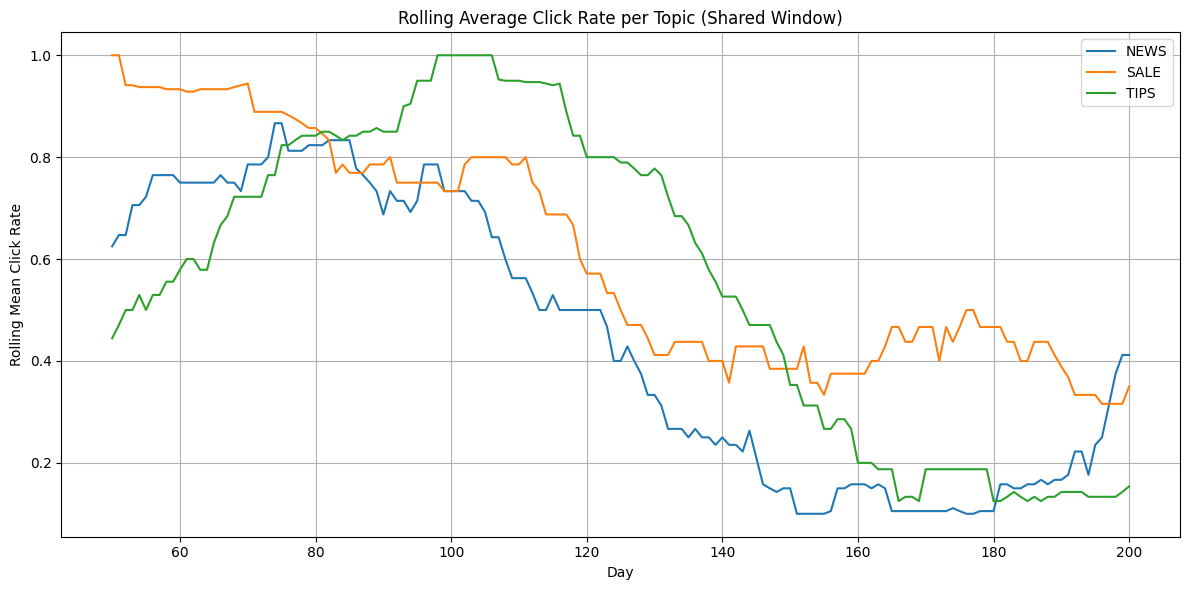

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot each topic as a line
for topic in topics:
    plt.plot(rolling_df['send_time'], rolling_df.get(topic, 0), label=topic)

plt.title("Rolling Average Click Rate per Topic (Shared Window)")
plt.xlabel("Day")
plt.ylabel("Rolling Mean Click Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The graph provides a clear view of how subscriber engagement with different types of email content evolves over time. It shows rolling average click rates for three email topics — “NEWS,” “SALE,” and “TIPS” — calculated using a moving time window. Instead of looking at raw, day-to-day performance (which can be noisy or inconsistent), this rolling approach smooths out the fluctuations and highlights meaningful trends.

Each line represents one topic and how it performs within the same time periods. By comparing them, we can see how interest in each type of content rises and falls. Some topics may gain momentum over time, while others lose their effectiveness. These shifts might reflect changes in subscriber interest, the timing or frequency of content, or even content fatigue when the same type of message appears too often.

What’s especially valuable here is that all topics are measured in parallel within the same window — creating a fair basis for comparison. This allows marketers to spot when one type of content starts outperforming another, when engagement is peaking or falling, and when it might be time to adjust strategy. It offers a dynamic, time-aware view of what’s resonating with the audience — not just once, but continuously throughout the campaign.

This code bellow identifies the most engaging topic on each day of the campaign, based on the rolling average click rates calculated earlier. For every day in the rolling dataset, it compares the performance of all three topics — “NEWS,” “SALE,” and “TIPS” — and selects the one with the highest engagement.

In [ ]:
# Get the topic with the highest rolling click rate for each day
rolling_df['top_topic'] = rolling_df[topics].idxmax(axis=1)

This line scans across the rolling click rates for each topic (within the same time window) and assigns the topic with the highest score to a new column called 'top_topic'. This shows, for each day, which topic was the most appealing to the subscriber — the one they were most likely to click.

The result is a timeline that tracks which topic dominated user attention over time. This kind of insight is important for understanding content preferences, recognizing shifts in interest, and making informed decisions about which topics to prioritize in future campaigns.

In [96]:
# Preview the result
print(rolling_df[['send_time', 'top_topic']].head(50))


    send_time top_topic
0          50      SALE
1          51      SALE
2          52      SALE
3          53      SALE
4          54      SALE
5          55      SALE
6          56      SALE
7          57      SALE
8          58      SALE
9          59      SALE
10         60      SALE
11         61      SALE
12         62      SALE
13         63      SALE
14         64      SALE
15         65      SALE
16         66      SALE
17         67      SALE
18         68      SALE
19         69      SALE
20         70      SALE
21         71      SALE
22         72      SALE
23         73      SALE
24         74      SALE
25         75      SALE
26         76      SALE
27         77      SALE
28         78      SALE
29         79      SALE
30         80      SALE
31         81      TIPS
32         82      TIPS
33         83      TIPS
34         84      NEWS
35         85      TIPS
36         86      TIPS
37         87      TIPS
38         88      TIPS
39         89      TIPS
40         90   

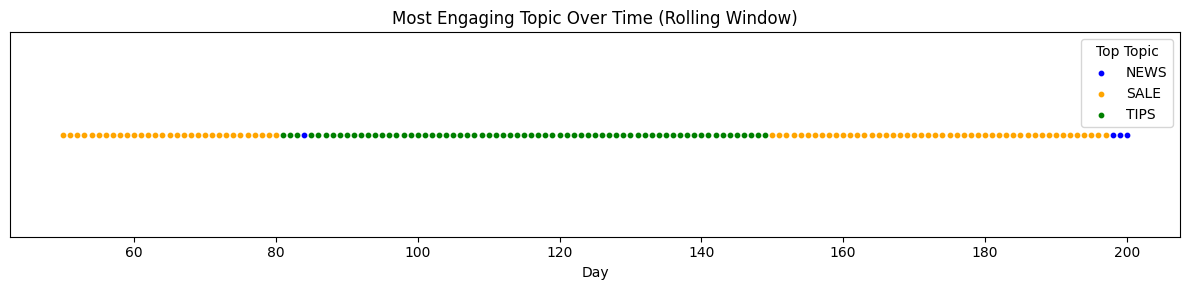

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))

# Assign each topic a color
topic_colors = {"NEWS": "blue", "SALE": "orange", "TIPS": "green"}

# Plot colored points showing the dominant topic each day
for topic in topics:
    mask = rolling_df['top_topic'] == topic
    plt.scatter(rolling_df.loc[mask, 'send_time'],
                [1] * mask.sum(),  # all y values = 1
                color=topic_colors[topic],
                label=topic,
                s=10)  # point size

plt.title("Most Engaging Topic Over Time (Rolling Window)")
plt.yticks([])  # remove y-axis since we only show categorical info
plt.xlabel("Day")
plt.legend(title="Top Topic")
plt.tight_layout()
plt.show()


So if we would like to use mathemtical language to write this all down we can do it by

Let’s define:

* $T = \{\text{NEWS}, \text{SALE}, \text{TIPS}\}$ — the set of all topics
* $C_t(d)$ — the click value (0 or 1) for topic $t$ on day $d$
* $w$ — the size of the sliding window (e.g., 50 days)
* $\bar{C}_t(d)$ — the rolling average click rate for topic $t$ ending on day $d$
* $\text{Top}(d)$ — the topic with the highest rolling average on day $d$


For each topic $t \in T$, the rolling average at day $d$ is:

$$
\bar{C}_t(d) = \frac{1}{w} \sum_{i = d - w + 1}^{d} C_t(i)
$$

This means:
Take the average of the click values for topic $t$ from day $d-w+1$ to day $d$.

$$
\text{Top}(d) = \arg\max_{t \in T} \bar{C}_t(d)
$$

This selects the topic $t$ with the **highest average click rate** in the window ending on day $d$.
